# Clayton Seabaugh: Building a Classifier
**Author:** Clayton Seabaugh  
**Date:** 3-28-2025  
**Objective:** Build and evaluate different models for machine learning classification

## Section 1. Import and Inspect the Data
Load the titanic dataset from the directly from the seaborn library.

In [42]:
# Imports

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

## Section 2. Data Exploration and Preparation
 
### 2.1 Handle Missing Values and Clean Data

In [44]:
# Impute missing values for age using the median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill in missing values for embark_town using the mode
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

C:\Users\clayt\AppData\Local\Temp\ipykernel_27452\3070868880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\clayt\AppData\Local\Temp\ipykernel_27452\3070868880.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

### 2.2 Feature Engineering


In [45]:
# Create new features

# Add family_size - number of family members on board
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
# Convert categorical "sex" to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
# Convert categorical "embarked" to numeric
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
# Binary feature - convert "alone" to numeric
titanic['alone'] = titanic['alone'].astype(int)

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target

Select two or more input features (numerical for regression, numerical and/or categorical for classification)
<br> Use survived as the target. 
<br> We will do three input cases like the example.
<br> First:

- input features: alone
target: survived
Second:

- input features - age (or another variable of your choice)
target: survived
Third:

- input features -  age and family_size (or another combination of your choice)
target: survived

### 3.2 Define X (features) and y (target)
- Assign input features to X a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Again - use comments to run a single case at a time
- The follow starts with only the statements needed for case 1. 
- Double brackets [[ ]]]  makes a 2D DataFrame
- Single brackets [ ]  make a 1D Series

In [46]:
# Case 1: alone only
# X = titanic[['alone']]
# y = titanic['survived']

# Case 2: age only
# X = titanic[['age']]
# y = titanic['survived']

# Case 3: age + family_size
X = titanic[['age', 'family_size']]
y = titanic['survived']

### Reflection 3:

Why are these features selected?
<br>Are there features that are likely to be highly predictive of survival?

## Section 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data

In [47]:
# Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)

In [48]:
# Create and train a decision tree model with no random initializer argument.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

In [49]:
# Evaluate model performance on training data

# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



In [50]:
# Evaluate model performance on test data:

# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



### 4.4 Report Confusion Matrix (as a heatmap)

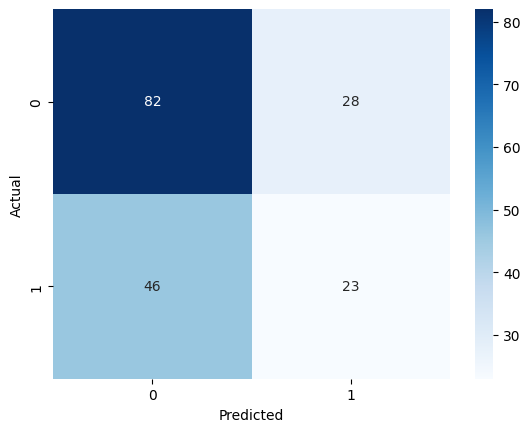

In [51]:
# Plot a confusion matrix:

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

### 4.5 Report Decision Tree Plot

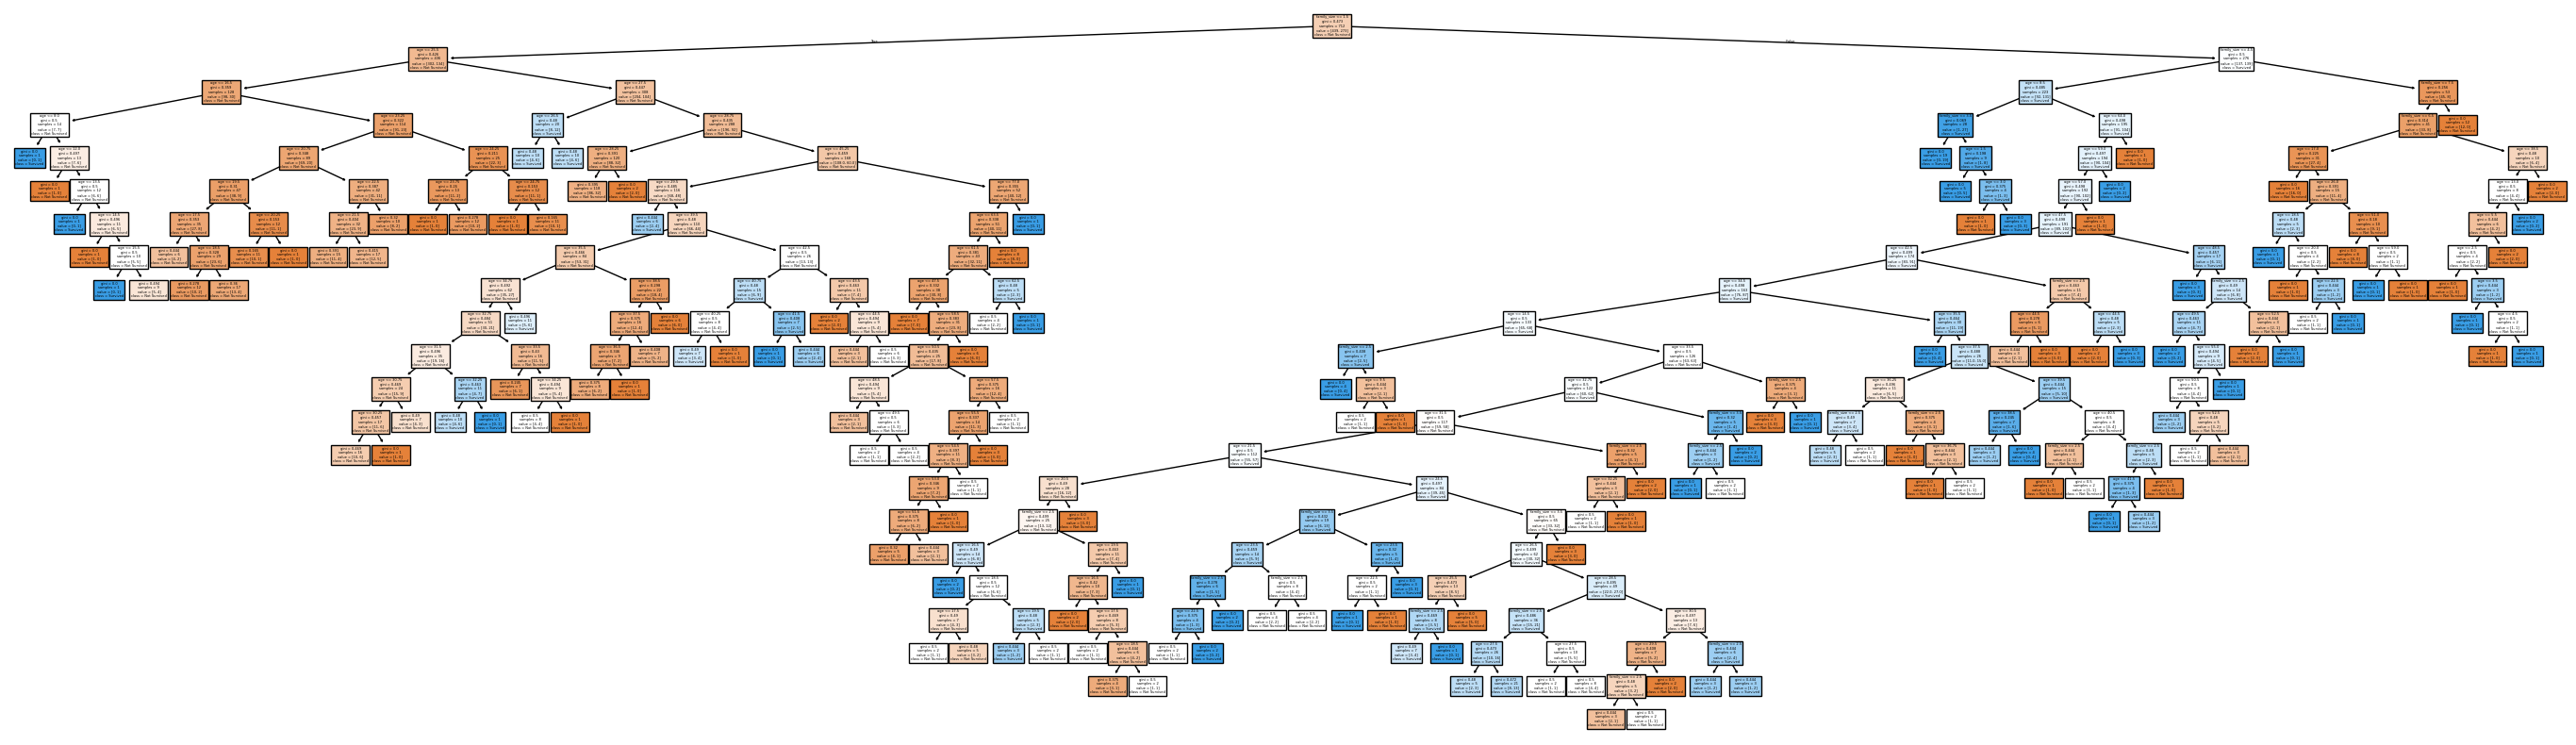

In [52]:
# Plot the decision tree model. 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(35,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

### Repeat for All 3 Cases
Try this for the 3 different cases: 
1) using height as the only input
2) using weight as the only input  
3) using height and weight together as inputs. 

## Section 5. Compare Alternative Models (SVC, NN)
In a Support Vector Machine, the kernel function defines how the algorithm transforms data to find a hyperplane that separates the classes. If the data is not linearly separable, changing the kernel can help the model find a better decision boundary.

SVC Kernel: Common Types

- RBF (Radial Basis Function) – Most commonly used; handles non-linear data well (default)
- Linear – Best for linearly separable data (straight line separation)
- Polynomial – Useful when the data follows a curved pattern
- Sigmoid – Similar to a neural network activation function; less common

In [54]:
from sklearn.svm import SVC
# RBF Kernel (default) - same as calling SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
svc_model = SVC(kernel='poly', degree=3)
svc_model.fit(X_train, y_train)

# Sigmoid Kernel
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

SVC(kernel='sigmoid')

## 5.2 Train and Evaluate Model (NN MLP)
Now we'll use the NN (Multi Level Perceptron ) model. Again, we will give the neural net as much information as possible and understand that it could overfit on the extra data.

We have some hyper parameters that we can adjust. For the other models we just let them run with their defaults. Here we are going to use 3 hidden layers and change up the solver to one that is more likely to give good results for a small data set.

Train a neural network model:

In [55]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

c:\Users\clayt\Documents\applied-ml-seabaugh\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')

In [56]:
# Predict and evaluate Neural Network model:

y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       110
           1       0.56      0.51      0.53        69

    accuracy                           0.65       179
   macro avg       0.63      0.63      0.63       179
weighted avg       0.65      0.65      0.65       179



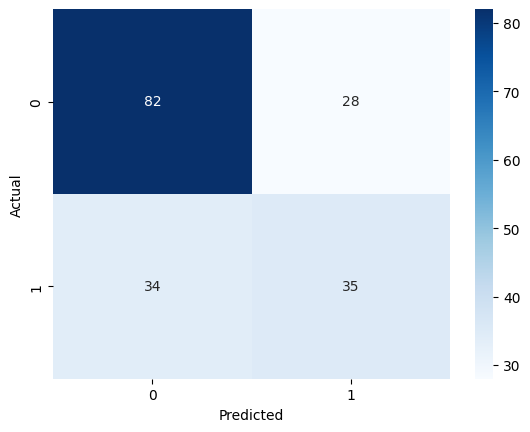

In [57]:
# Plot confusion matrix:

cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Reflection 5:
- How well did each model perform?
- Are there any surprising results?
- Why might one model outperform the others?

## Section 6. Final Thoughts & Insights
### 6.1 Summarize Findings
- What indicators are strong predictors of gender?
- Decision Tree performed well but overfit slightly on training data.
- Neural Network showed moderate improvement but introduced complexity.

### 6.2 Discuss Challenges Faced
- Small sample size could limit generalizability.
- Missing values (if any) could bias the model.

### 6.3 Next Steps
- Test more features (e.g., BMI class).
- Try hyperparameter tuning for better results.